In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/README.md.txt
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images/Normal-859.png
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images/Normal-158.png
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images/Normal-10121.png
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images/Normal-1811.png
/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images/Normal-97.png
/kaggle/input/covid19

In [6]:
import numpy as np
import pandas as pd 
from keras.layers import Input, Lambda, Dense, Flatten , Dropout , MaxPool2D
from keras.models import Model , Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt
import random
import os
from distutils.file_util import copy_file
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau

In [7]:
covidDataPath='../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID'
pneumoniaDataPath='../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia'
normalDataPath='../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal'
lungopacityDataPath = '../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity'

In [8]:
# Lists for access paths
listCovidPaths = []
listNormalPaths = []
listPneumoniaPaths = []
listLOPaths = []

# Get covid images files paths
for root, directories, files in os.walk(covidDataPath):
    for name in files:
        listCovidPaths.append(os.path.join(root, name))
# Get Pneumonia images files paths
for root, directories, files in os.walk(pneumoniaDataPath):
    for name in files:
        listPneumoniaPaths.append(os.path.join(root, name))        
        
# Get normal images files paths
for root, directories, files in os.walk(normalDataPath):
    for name in files:
        listNormalPaths.append(os.path.join(root, name))

# Get lung opacity images files paths
for root, directories, files in os.walk(lungopacityDataPath):
    for name in files:
        listLOPaths.append(os.path.join(root, name))    
    
    
# Shuffle lists for random train / test

random.shuffle(listCovidPaths)
random.shuffle(listNormalPaths)
random.shuffle(listPneumoniaPaths)
random.shuffle(listLOPaths)

In [9]:
len(listPneumoniaPaths)

2690

In [11]:
# main folder
!mkdir ./Data/

# Train data folders
!mkdir ./Data/Train/
!mkdir ./Data/Train/Covid/
!mkdir ./Data/Train/Normal/
!mkdir ./Data/Train/Pneumonia/
!mkdir ./Data/Train/LO/

# Test data folders
!mkdir ./Data/Test/
!mkdir ./Data/Test/Covid/
!mkdir ./Data/Test/Normal/
!mkdir ./Data/Test/Pneumonia/
!mkdir ./Data/Test/LO/

# Valid data folders
!mkdir ./Data/Valid/
!mkdir ./Data/Valid/Covid/
!mkdir ./Data/Valid/Normal/
!mkdir ./Data/Valid/Pneumonia/
!mkdir ./Data/Valid/LO/

# Paths to covid images folders
pathCovidTrain = './Data/Train/Covid/'
pathCovidTest = './Data/Test/Covid/'
pathCovidValid='./Data/Valid/Covid/'


# Paths to Pneumonia images folders
pathPneumoniaTrain = './Data/Train/Pneumonia/'
pathPneumoniaTest = './Data/Test/Pneumonia/'
pathPneumoniaValid='./Data/Valid/Pneumonia/'

# Paths to normal images folders
pathNormalTrain = './Data/Train/Normal/'
pathNormalTest = './Data/Test/Normal/'
pathNormalValid='./Data/Valid/Normal/'

# Paths to LO images folders
pathLOTrain = './Data/Train/LO/'
pathLOTest = './Data/Test/LO/'
pathLOValid='./Data/Valid/LO/'


mkdir: cannot create directory ‘./Data/’: File exists
mkdir: cannot create directory ‘./Data/Train/’: File exists
mkdir: cannot create directory ‘./Data/Train/Covid/’: File exists
mkdir: cannot create directory ‘./Data/Train/Normal/’: File exists
mkdir: cannot create directory ‘./Data/Train/Pneumonia/’: File exists
mkdir: cannot create directory ‘./Data/Train/LO/’: File exists
mkdir: cannot create directory ‘./Data/Test/’: File exists
mkdir: cannot create directory ‘./Data/Test/Covid/’: File exists
mkdir: cannot create directory ‘./Data/Test/Normal/’: File exists
mkdir: cannot create directory ‘./Data/Test/Pneumonia/’: File exists
mkdir: cannot create directory ‘./Data/Test/LO/’: File exists
mkdir: cannot create directory ‘./Data/Valid/’: File exists
mkdir: cannot create directory ‘./Data/Valid/Covid/’: File exists
mkdir: cannot create directory ‘./Data/Valid/Normal/’: File exists
mkdir: cannot create directory ‘./Data/Valid/Pneumonia/’: File exists
mkdir: cannot create directory ‘./Da

In [12]:
"""
Moving files to new folders
"""

# Move covid images files to new folders
for i in range(3616):
    if i < 2893:
        copy_file(listCovidPaths[i], pathCovidTrain)
    elif i>=2893 and i<=3255:
        copy_file(listCovidPaths[i], pathCovidValid)
    else  : 
        copy_file(listCovidPaths[i], pathCovidTest)
        
for i in range(10192):
    if i < 8154:
        copy_file(listNormalPaths[i], pathNormalTrain)
    elif i>=8154 and i<=9174:
        copy_file(listNormalPaths[i], pathNormalValid)     
    else  : 
        copy_file(listNormalPaths[i], pathNormalTest)   
        
for i in range(2656):
    if i < 1719:
        copy_file(listPneumoniaPaths[i], pathPneumoniaTrain)
    elif i>=1719 and i<=2234:
        copy_file(listPneumoniaPaths[i], pathPneumoniaValid)     
    else  : 
        copy_file(listPneumoniaPaths[i], pathPneumoniaTest) 
        
for i in range(12020):
    if i < 9156:
        copy_file(listLOPaths[i], pathLOTrain)
    elif i>=9156 and i<=10576:
        copy_file(listLOPaths[i], pathLOValid)     
    else  : 
        copy_file(listLOPaths[i], pathLOTest) 

# **Data Augmentation**

In [13]:
train_data_gen = ImageDataGenerator(rescale=1./255 ,
                                    zoom_range= 0.3, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    rotation_range = 30
                                    )

train = train_data_gen.flow_from_directory(directory= './Data/Train',
                                           class_mode = 'binary',
                                           batch_size=64,
                                           target_size=(299, 299))

Found 15684 images belonging to 4 classes.


In [17]:
test_data_gen = ImageDataGenerator(rescale=1./255 )

test = test_data_gen.flow_from_directory(directory= './Data/Test' , 
                                          target_size=(299, 299), 
                                            class_mode = 'binary',
                                        shuffle=False,
                                        batch_size=64)

valid = test_data_gen.flow_from_directory(directory= './Data/Valid' , 
                                          target_size=(299, 299), 
                                            class_mode = 'binary',
                                        shuffle=False,
                                        batch_size=64)

Found 3088 images belonging to 4 classes.
Found 3154 images belonging to 4 classes.


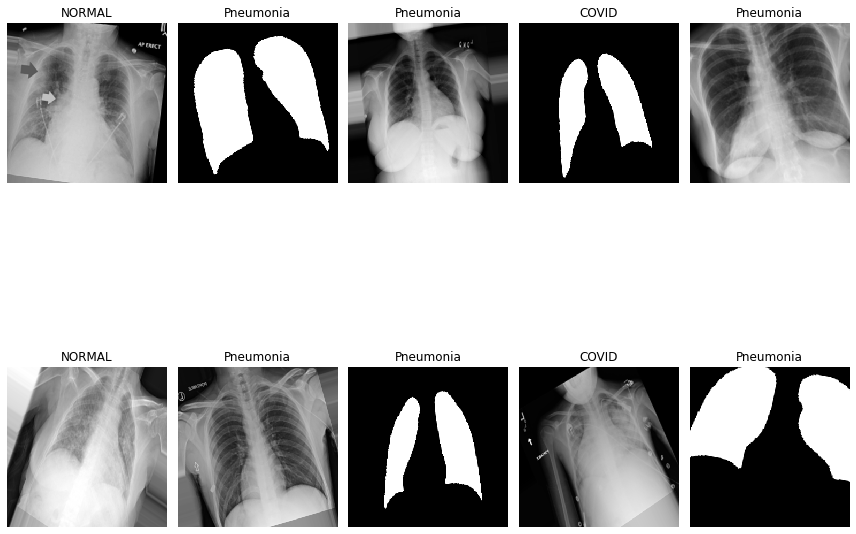

In [18]:
print("\n")
print("\n")
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'COVID', 2:'Pneumonia',3:'Lung_Opacity'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

# Inception-ResNet v2 architecture.

In [11]:
inc1 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(299, 299, 3),
    pooling='avg',
    classes=1000,
    classifier_activation='softmax'
)

2023-01-29 08:22:46.152229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 08:22:46.153326: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 08:22:46.306757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 08:22:46.307865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 08:22:46.308739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

225222656/225209952 [==============================] - 1s 0us/step


In [12]:
for layer in inc1.layers:           
  layer.training = True

In [13]:
'''
Definition of the Keras model outputs
'''

x = Flatten()(inc1.output)
prediction= Dense(units=1 , activation='softmax')(x)

model1 = Model(inc1.input,prediction)

In [14]:
"""
Compile model
"""

model1.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [18]:
hist1 = model1.fit(train, steps_per_epoch= len(train), epochs=10, validation_data= valid)

Epoch 1/10
245/245 [==============================] - 690s 3s/step - loss: 0.2800 - accuracy: 0.3625 - val_loss: 0.0185 - val_accuracy: 0.4213
Epoch 2/10
245/245 [==============================] - 678s 3s/step - loss: -0.0798 - accuracy: 0.3625 - val_loss: -0.3354 - val_accuracy: 0.4213
Epoch 3/10
245/245 [==============================] - 680s 3s/step - loss: -0.3643 - accuracy: 0.3625 - val_loss: -0.6314 - val_accuracy: 0.4213
Epoch 4/10
245/245 [==============================] - 681s 3s/step - loss: -0.6057 - accuracy: 0.3625 - val_loss: -0.8927 - val_accuracy: 0.4213
Epoch 5/10
245/245 [==============================] - 681s 3s/step - loss: -0.8202 - accuracy: 0.3625 - val_loss: -1.1315 - val_accuracy: 0.4213
Epoch 6/10
245/245 [==============================] - 678s 3s/step - loss: -1.0177 - accuracy: 0.3625 - val_loss: -1.3570 - val_accuracy: 0.4213
Epoch 7/10
245/245 [==============================] - 677s 3s/step - loss: -1.2050 - accuracy: 0.3625 - val_loss: -1.5746 - val_accu

In [19]:
model1.save('./InceptionResNetV2')

2023-01-29 10:23:43.287272: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [ ]:

# early = EarlyStopping(monitor='val_accuracy', mode='min', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, cooldown=0, verbose=1,factor=0.3, min_lr=0.000001)
# callbacks_list = [ early, learning_rate_reduction]

In [ ]:
#!pip install -U scikit-learn scipy matplotlib

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight(
#                                         class_weight = "balanced",
#                                         classes = np.unique(train.classes),
#                                         y = train.classes                                                    
#                                     )
# class_weights = dict(zip(np.unique(train.classes), class_weights))
# class_weights

# EfficientNetV2S Architecture ** ERROR **

In [ ]:
# !pip install keras-applications

In [ ]:
# inc2 = tf.keras.applications.efficientnet_v2.EfficientNetV2(
#     include_top=True,
#     weights='imagenet',
#     input_tensor=None,
#     input_shape=(299, 299, 3),
#     pooling='avg',
#     classes=1000,
#     classifier_activation='softmax'
# )

In [ ]:
# for layer in inc2.layers:           
#   layer.training = True

In [26]:
# '''
# Definition of the Keras model outputs
# '''

# x = Flatten()(inc2.output)
# prediction= Dense(units=1 , activation='softmax')(x)

# model2 = Model(inc2.input,prediction)

'\n# Definition of the Keras model outputs\n# '

In [ ]:
# """
# Compile model
# """

# model2.compile(
#     optimizer = tf.keras.optimizers.Adam(0.001),
#     loss = 'binary_crossentropy',
#     metrics = ['accuracy']
# )

In [ ]:

# early = EarlyStopping(monitor='val_accuracy', mode='min', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, cooldown=0, verbose=1,factor=0.3, min_lr=0.000001)
# callbacks_list = [ early, learning_rate_reduction]

In [ ]:
# class_weights = compute_class_weight(
#                                         class_weight = "balanced",
#                                         classes = np.unique(train.classes),
#                                         y = train.classes                                                    
#                                     )
# class_weights = dict(zip(np.unique(train.classes), class_weights))
# class_weights

In [ ]:
# hist = model2.fit(train, steps_per_epoch= len(train), epochs=10 , validation_data= valid,class_weight=class_weights,validation_steps= len(test), callbacks=callbacks_list)

# InceptionV3 Architecture

In [23]:
inc3 = tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(299, 299, 3),
    pooling='avg',
    classes=1000,
    classifier_activation='softmax'
)

96124928/96112376 [==============================] - 1s 0us/step


In [24]:
for layer in inc3.layers:           
  layer.training = True

In [28]:
'''
Definition of the Keras model outputs
'''

x = Flatten()(inc3.output)
prediction= Dense(units=1 , activation='softmax')(x)

model3 = Model(inc3.input,prediction)

In [29]:
"""
Compile model
"""

model3.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:

# early = EarlyStopping(monitor='val_accuracy', mode='min', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, cooldown=0, verbose=1,factor=0.3, min_lr=0.000001)
# callbacks_list = [ early, learning_rate_reduction]

In [ ]:
# class_weights = compute_class_weight(
#                                         class_weight = "balanced",
#                                         classes = np.unique(train.classes),
#                                         y = train.classes                                                    
#                                     )
# class_weights = dict(zip(np.unique(train.classes), class_weights))
# class_weights

In [32]:
hist3 = model3.fit(train, steps_per_epoch= len(train), epochs=10, validation_data= valid)

Epoch 1/10
245/245 [==============================] - 507s 2s/step - loss: -0.4452 - accuracy: 0.3625 - val_loss: -0.7190 - val_accuracy: 0.4213
Epoch 2/10
245/245 [==============================] - 510s 2s/step - loss: -0.6783 - accuracy: 0.3625 - val_loss: -0.9738 - val_accuracy: 0.4213
Epoch 3/10
245/245 [==============================] - 508s 2s/step - loss: -0.8880 - accuracy: 0.3625 - val_loss: -1.2098 - val_accuracy: 0.4213
Epoch 4/10
245/245 [==============================] - 510s 2s/step - loss: -1.0829 - accuracy: 0.3625 - val_loss: -1.4336 - val_accuracy: 0.4213
Epoch 5/10
245/245 [==============================] - 499s 2s/step - loss: -1.2688 - accuracy: 0.3625 - val_loss: -1.6514 - val_accuracy: 0.4213
Epoch 6/10
245/245 [==============================] - 506s 2s/step - loss: -1.4498 - accuracy: 0.3625 - val_loss: -1.8655 - val_accuracy: 0.4213
Epoch 7/10
245/245 [==============================] - 507s 2s/step - loss: -1.6287 - accuracy: 0.3625 - val_loss: -2.0799 - val_ac

In [ ]:
model3.save('./InceptionV3')

# VGG Augmentation

In [44]:
# train_data_gen = ImageDataGenerator(rescale=1./255 ,
#                                     zoom_range= 0.3, 
#                                     horizontal_flip= True, 
#                                     shear_range= 0.2,
#                                     rotation_range = 30
#                                     )

# train = train_data_gen.flow_from_directory(directory= './Data/Train',
#                                            class_mode = 'binary',
#                                            batch_size=64,
#                                            target_size=(224, 224))

Found 15836 images belonging to 4 classes.


In [45]:
# test_data_gen = ImageDataGenerator(rescale=1./255 )

# test = test_data_gen.flow_from_directory(directory= './Data/Test' , 
#                                           target_size=(224, 224), 
#                                             class_mode = 'binary',
#                                         shuffle=False,
#                                         batch_size=64)

# valid = test_data_gen.flow_from_directory(directory= './Data/Valid' , 
#                                           target_size=(224, 224), 
#                                             class_mode = 'binary',
#                                         shuffle=False,
#                                         batch_size=64)

Found 3082 images belonging to 4 classes.
Found 3147 images belonging to 4 classes.


# VGG16

In [24]:
inc4 = tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg',
    classes=1000,
    classifier_activation='softmax'
)

553476096/553467096 [==============================] - 3s 0us/step


In [26]:
for layer in inc4.layers:           
  layer.training = True

In [28]:
'''
Definition of the Keras model outputs
'''

x = Flatten()(inc4.output)
prediction= Dense(units=1 , activation='softmax')(x)

model4 = Model(inc4.input,prediction)

In [30]:
"""
Compile model
"""

model4.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [50]:

# early = EarlyStopping(monitor='val_accuracy', mode='min', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, cooldown=0, verbose=1,factor=0.3, min_lr=0.000001)
# callbacks_list = [ early, learning_rate_reduction]

In [51]:
# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight(
#                                         class_weight = "balanced",
#                                         classes = np.unique(train.classes),
#                                         y = train.classes                                                    
#                                     )
# class_weights = dict(zip(np.unique(train.classes), class_weights))
# class_weights

{0: 1.6198854337152209,
 1: 0.6990994172699982,
 2: 0.6043352159975576,
 3: 3.360780984719864}

In [31]:
hist4 = model4.fit(train, steps_per_epoch= len(train), epochs=10, validation_data= valid)

Epoch 1/10


InvalidArgumentError:  Input to reshape is a tensor with 2654208 values, but the requested shape requires a multiple of 25088
	 [[node model_2/flatten/Reshape (defined at tmp/ipykernel_23/3170336660.py:1) ]] [Op:__inference_train_function_19142]

Function call stack:
train_function


In [ ]:
# model4.save('./VGG16')

In [ ]:
from matplotlib import pyplot as plt
# training_loss_IRNv2 = hist1.history['loss']
# test_loss_IRNv2 = hist1.history['val_loss']
# training_loss_Iv3 = hist3.history['loss']
# test_loss_Iv3 = hist3.history['val_loss']
training_loss_VGG16 = hist4.history['loss']
test_loss_VGG16 = hist4.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
# plt.plot(epoch_count, training_loss_IRNv2, 'g-')
# plt.plot(epoch_count, test_loss_IRNv2, 'b-')
# plt.plot(epoch_count, training_loss_Iv3, 'r--')
# plt.plot(epoch_count, test_loss_Iv3, 'y--')
plt.plot(epoch_count, training_loss_VGG16, 'g--')
plt.plot(epoch_count, test_loss_VGG16, 'b--')
plt.legend(['Training Loss_VGG16', 'Test Loss_VGG16'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Mobilenet

In [19]:
inc5 = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
   
)

2023-01-29 14:02:41.760051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 14:02:41.867919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 14:02:41.868773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 14:02:41.870391: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

14548992/14536120 [==============================] - 0s 0us/step


In [20]:
for layer in inc5.layers:           
  layer.training = True

In [21]:
'''
Definition of the Keras model outputs
'''

x = Flatten()(inc5.output)
prediction= Dense(units=1 , activation='softmax')(x)

model5 = Model(inc5.input,prediction)

In [22]:
"""
Compile model
"""

model5.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [23]:
hist5 = model5.fit(train, steps_per_epoch= len(train), epochs=10, validation_data= valid)

2023-01-29 14:03:04.147873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-01-29 14:03:10.651442: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


246/246 [==============================] - 389s 2s/step - loss: 0.4190 - accuracy: 0.3606 - val_loss: 0.1561 - val_accuracy: 0.4214
Epoch 2/10
246/246 [==============================] - 381s 2s/step - loss: 0.0090 - accuracy: 0.3606 - val_loss: -0.2092 - val_accuracy: 0.4214
Epoch 3/10
246/246 [==============================] - 378s 2s/step - loss: -0.3096 - accuracy: 0.3606 - val_loss: -0.5393 - val_accuracy: 0.4214
Epoch 4/10
246/246 [==============================] - 380s 2s/step - loss: -0.5683 - accuracy: 0.3606 - val_loss: -0.8470 - val_accuracy: 0.4214
Epoch 5/10
246/246 [==============================] - 377s 2s/step - loss: -0.7922 - accuracy: 0.3606 - val_loss: -1.0906 - val_accuracy: 0.4214
Epoch 6/10
246/246 [==============================] - 382s 2s/step - loss: -0.9971 - accuracy: 0.3606 - val_loss: -1.3238 - val_accuracy: 0.4214
Epoch 7/10
246/246 [==============================] - 379s 2s/step - loss: -1.1894 - accuracy: 0.3606 - val_loss: -1.5460 - val_accuracy: 0.4214

Feature Extraction

In [40]:
import tensorflow as tf

attention_features_shape = 100
image_path = "./Data/Train/Covid/"

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.mobilenet_v2.MobileNetV2.preprocess_input(img)
    return img, image_path


image_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                                                weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step
